#Importing needed libraries

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import cv2
import pydot

# Define a function to load the dataset

In [ ]:
def load_dataset(directory):
  images = []
  labels = []
  for idx, label in enumerate(uniq_labels):
    for file in os.listdir(directory + '/'+label):
      filepath = directory +'/'+ label + "/" + file
      img = cv2.resize(cv2.imread(filepath),(50,50))
      images.append(img)
      labels.append(idx)
  images = np.asarray(images)
  labels = np.asarray(labels)
  return images, labels

# Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Define the directory where your dataset is stored

In [ ]:
data_dir = '/content/drive/My Drive/Gesture Image Data'

# Get the list of unique labels in the dataset

In [ ]:
uniq_labels = sorted(os.listdir(data_dir))


#Spliting dataset into train and test set

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

NameError: name 'X' is not defined

# Convert the labels to categorical format

In [ ]:
num_classes = len(uniq_labels)
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Define the CNN model architecture

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=X_train.shape[1:]),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(units=128, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(units=num_classes, activation='softmax')
])

#Compile the model

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define data augmentation parameters

In [ ]:
datagen = ImageDataGenerator(
  rotation_range=20,
  width_shift_range=0.2,
  height_shift_range=0.2,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip=True,
  fill_mode='nearest'
)


# Fit the data generator to the training set

In [ ]:
datagen.fit(X_train)

#Train the model

In [ ]:
history = model.fit(
  datagen.flow(X_train, y_train, batch_size=32),
  epochs=10,
  validation_data=(X_test, y_test)
)

Epoch 1/10
1116/1116 [==============================] - 174s 153ms/step - loss: 3.0460 - accuracy: 0.2319 - val_loss: 0.8701 - val_accuracy: 0.7157
Epoch 2/10
1116/1116 [==============================] - 169s 151ms/step - loss: 1.4142 - accuracy: 0.5173 - val_loss: 0.6109 - val_accuracy: 0.7981
Epoch 3/10
1116/1116 [==============================] - 166s 149ms/step - loss: 0.9753 - accuracy: 0.6587 - val_loss: 0.2526 - val_accuracy: 0.9126
Epoch 4/10
1116/1116 [==============================] - 167s 149ms/step - loss: 0.7324 - accuracy: 0.7435 - val_loss: 0.2855 - val_accuracy: 0.9066
Epoch 5/10
1116/1116 [==============================] - 165s 148ms/step - loss: 0.5724 - accuracy: 0.8059 - val_loss: 0.1053 - val_accuracy: 0.9667
Epoch 6/10
1116/1116 [==============================] - 164s 147ms/step - loss: 0.4535 - accuracy: 0.8437 - val_loss: 0.0953 - val_accuracy: 0.9678
Epoch 7/10
1116/1116 [==============================] - 165s 148ms/step - loss: 0.4295 - accuracy: 0.8581 - val_

# Evaluate the model on the test set

In [ ]:
# Evaluate the model on the test set
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.11251290887594223
Test accuracy: 0.9668198823928833


# Load the dataset using the load_dataset() function

In [ ]:
X, y = load_dataset(data_dir)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import cv2
import pydot


#load_dataset function to load the data and resize the images to 50x50

In [ ]:
def load_dataset(directory):
  images = []
  labels = []
  for idx, label in enumerate(uniq_labels):
    for file in os.listdir(directory + '/'+label):
      filepath = directory +'/'+ label + "/" + file
      img = cv2.resize(cv2.imread(filepath),(50,50))
      images.append(img)
      labels.append(idx)
  images = np.asarray(images)
  labels = np.asarray(labels)
  return images, labels



# Mounting drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

folder_id = '1Ipr4w6c6cZW34L__10qJTNVO9jJmpE0q'
folder_path = '/content/drive/My Drive/Gesture Image Data'.format(folder_id)

for file_name in os.listdir(folder_path):
    print(file_name)

book
children
babbon
B
brother
C
D
A
9
cat
_
Z
Y
yes
W
X
wednesday
U
V
tuesday
thursday
think
table
teach
T
sign
sister
sunday
see
shoe
sartarday
S
R
Q
P
O
nurse
N
mother
monday
M
language
lie
learn
L
K
J
I
honest
H
give
G
friday
fly
E
F
father
do
dog
doctor
8
7
6
5
4
3
2
0
1


#loading_dataset into X_pre and Y_pre

In [ ]:
data_dir = '/content/drive/My Drive/Gesture Image Data'
uniq_labels = sorted(os.listdir(data_dir))
X_pre, Y_pre = load_dataset(data_dir)
print(X_pre.shape, Y_pre.shape)


(44603, 50, 50, 3) (44603,)


#spliting dataset into 80% train, 10% validation and 10% test data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_pre, Y_pre, test_size = 0.8)
X_test, X_eval, Y_test, Y_eval = train_test_split(X_test, Y_test, test_size = 0.2)


ValueError: ignored

KeyboardInterrupt: ignored

In [ ]:
from keras.preprocessing import image

#print shapes and show examples for each set

In [ ]:
extent = (1, 2, 2, 1)
print("Train images shape",X_train.shape, Y_train.shape)
print("Test images shape",X_test.shape, Y_test.shape)
print("Evaluate image shape",X_eval.shape, Y_eval.shape)
print("Printing the labels",uniq_labels, len(uniq_labels))

# display_images(X_test,Y_test,'Samples from Test Set')
# display_images(X_eval,Y_eval,'Samples from Validation Set')


Train images shape (8920, 50, 50, 3) (8920,)
Test images shape (17841, 50, 50, 3) (17841,)
Evaluate image shape (17842, 50, 50, 3) (17842,)
Printing the labels ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '_', 'babbon', 'book', 'brother', 'cat', 'children', 'do', 'doctor', 'dog', 'father', 'fly', 'friday', 'give', 'honest', 'language', 'learn', 'lie', 'monday', 'mother', 'nurse', 'sartarday', 'see', 'shoe', 'sign', 'sister', 'sunday', 'table', 'teach', 'think', 'thursday', 'tuesday', 'wednesday', 'yes'] 69


Samples from Train Set X


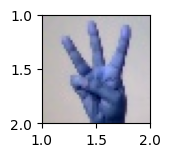

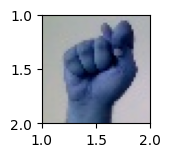

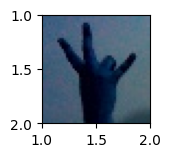

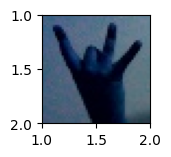

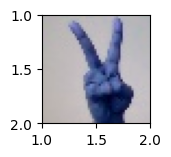

In [ ]:
print('Samples from Train Set X')
for i in range(0,5):
  plt.subplot(3,3,i+1)
  plt.imshow(X_train[i], extent=extent)
  plt.show()

Samples from Test Set X


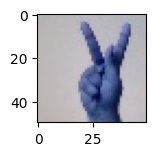

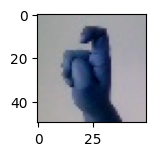

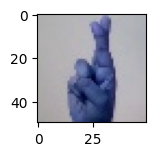

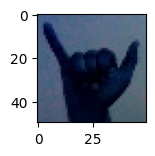

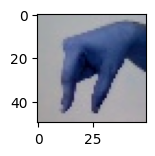

In [ ]:
print('Samples from Test Set X')
for i in range(0,5):
  plt.subplot(3,3,i+1)
  plt.imshow(X_test[i])
  plt.show()


# converting Y_tes and Y_train to One hot vectors using to_categorical

In [ ]:
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
Y_eval = to_categorical(Y_eval)
X_train = X_train / 255.
X_test = X_test/ 255.
X_eval = X_eval/ 255.


In [ ]:
model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(16, (3,3), activation ='relu', input_shape=(50,50,3)),
        tf.keras.layers.Conv2D(16, (3,3), activation ='relu'),
        tf.keras.layers.Conv2D(16, (3,3), activation ='relu'),
        tf.keras.layers.MaxPool2D((2,2)),
        tf.keras.layers.Conv2D(32, (3,3), activation ='relu'),
        tf.keras.layers.Conv2D(32, (3,3), activation ='relu'),
        tf.keras.layers.Conv2D(32, (3,3), activation ='relu'),
        tf.keras.layers.MaxPool2D((2,2)),
        tf.keras.layers.Conv2D(64, (3,3), activation ='relu'),
        tf.keras.layers.Conv2D(64, (3,3), activation ='relu'),
        tf.keras.layers.Conv2D(64, (3,3), activation ='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(68, activation='softmax')

        ])

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 16)        2320      
                                                                 
 conv2d_2 (Conv2D)           (None, 44, 44, 16)        2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 16)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 20, 20, 32)        4640      
                                                                 
 conv2d_4 (Conv2D)           (None, 18, 18, 32)        9248      
                                                        


#compiling the model, default batch size 32, default learning rate is 0.001


In [ ]:
model.compile(optimizer = 'adam',
               loss = 'categorical_crossentropy',
               metrics=['accuracy'],)


#start training(fitting) the data

In [ ]:
history =model.fit(Y_train, epochs=10, verbose=True)
# history = model.fit(X_train, Y_train, epochs=20, verbose=1)

Epoch 1/10


ValueError: ignored